<a href="https://colab.research.google.com/github/SampadSikder/DP-Protocols/blob/main/UserLevelDatasetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import argparse
import math
import matplotlib.pyplot as plt

In [ ]:
import random
from multiprocessing import Pool
import numpy as np
import xxhash
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from dataclasses import dataclass
from typing import Literal, Dict, Any, List
from scipy.special import erfcinv

from tqdm import tqdm
import seaborn as sns


## Merge

In [ ]:
file_paths = [
    '/content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats_f1.csv',
    '/content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats_f2.csv',
    '/content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats_f3.csv',
    '/content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats_f4.csv',
]

# Read and merge all CSV files
dfs = []
for path in file_paths:
    df = pd.read_csv(path)
    dfs.append(df)
    print(f"Loaded {path}: {len(df)} rows")

# Concatenate all dataframes
merged_df = pd.concat(dfs, ignore_index=True)

print(f"\nTotal rows after merging: {len(merged_df)}")

# Save the merged dataframe
output_path = '/content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats-merged.csv'
merged_df.to_csv(output_path, index=False)

print(f"Merged file saved to: {output_path}")

Loaded /content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats_f1.csv: 1200000 rows
Loaded /content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats_f2.csv: 1200000 rows
Loaded /content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats_f3.csv: 1200000 rows
Loaded /content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats_f4.csv: 1200000 rows

Total rows after merging: 4800000
Merged file saved to: /content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats-merged.csv


In [ ]:
df_path = '/content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats-merged.csv'

In [ ]:
df = pd.read_csv(df_path)

In [ ]:
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"\nFirst few rows:")
print(df.head())

Total rows: 4800000
Total columns: 24

First few rows:
   num_ones  k_discrepancy  k_observed_frequency  k_theoretical_frequency  \
0     271.0       0.001984                0.0248                 0.026784   
1     252.0       0.000250                0.0068                 0.007050   
2     266.0       0.003059                0.0256                 0.022541   
3     262.0       0.002475                0.0204                 0.017925   
4     286.0       0.001888                0.0232                 0.021312   

   freq_ratio  is_anomalous_k  overlap_anomalous_items_count  \
0    0.925938             0.0                          271.0   
1    0.964594             0.0                          252.0   
2    1.135699             0.0                          266.0   
3    1.138089             0.0                          262.0   
4    1.088604             0.0                          286.0   

   overlap_anomalous_items_ratio  mean_item_freq_ratio  max_item_freq_ratio  \
0                 

In [ ]:
print(f"Columns: ")
print(df.columns)

Columns: 
Index(['num_ones', 'k_discrepancy', 'k_observed_frequency',
       'k_theoretical_frequency', 'freq_ratio', 'is_anomalous_k',
       'overlap_anomalous_items_count', 'overlap_anomalous_items_ratio',
       'mean_item_freq_ratio', 'max_item_freq_ratio', 'std_item_freq_ratio',
       'support_entropy', 'max_support_value', 'theoretical_probability_k',
       'log_likelihood', 'wasserstein_distance_k', 'js_divergence_k',
       'target_set_size', 'attacker_ratio', 'protocol', 'splits', 'epsilon',
       'dataset_type', 'label'],
      dtype='object')


In [ ]:
label_1_df = df[df['label'] == 1]
label_0_df = df[df['label'] == 0]

In [ ]:
print(f"Total rows: Attacked {len(label_1_df)}")
print(f"Total columns: Attacked {len(label_1_df.columns)}")
print(f"\nFirst few rows: Attacked")
print(label_1_df.head())

Total rows: Attacked 780000
Total columns: Attacked 24

First few rows: Attacked
      num_ones  k_discrepancy  k_observed_frequency  k_theoretical_frequency  \
4500     282.0       0.004636                0.0206                 0.025236   
4501     294.0       0.001653                0.0104                 0.012053   
4502     285.0       0.003394                0.0190                 0.022394   
4503     266.0       0.003059                0.0256                 0.022541   
4504     263.0       0.004873                0.0240                 0.019127   

      freq_ratio  is_anomalous_k  overlap_anomalous_items_count  \
4500    0.816295             1.0                          282.0   
4501    0.862836             0.0                          294.0   
4502    0.848433             1.0                          285.0   
4503    1.135699             0.0                          266.0   
4504    1.254742             1.0                          263.0   

      overlap_anomalous_items_ratio

In [ ]:
print(f"Total rows: Benign {len(label_0_df)}")
print(f"Total columns: Benign {len(label_0_df.columns)}")
print(f"\nFirst few rows: Benign")
print(label_1_df.head())

Total rows: Benign 4020000
Total columns: Benign 24

First few rows: Benign
      num_ones  k_discrepancy  k_observed_frequency  k_theoretical_frequency  \
4500     282.0       0.004636                0.0206                 0.025236   
4501     294.0       0.001653                0.0104                 0.012053   
4502     285.0       0.003394                0.0190                 0.022394   
4503     266.0       0.003059                0.0256                 0.022541   
4504     263.0       0.004873                0.0240                 0.019127   

      freq_ratio  is_anomalous_k  overlap_anomalous_items_count  \
4500    0.816295             1.0                          282.0   
4501    0.862836             0.0                          294.0   
4502    0.848433             1.0                          285.0   
4503    1.135699             0.0                          266.0   
4504    1.254742             1.0                          263.0   

      overlap_anomalous_items_ratio  mea

## Correlation Matrix

Numerical columns: ['num_ones', 'k_discrepancy', 'k_observed_frequency', 'k_theoretical_frequency', 'freq_ratio', 'is_anomalous_k', 'overlap_anomalous_items_count', 'overlap_anomalous_items_ratio', 'mean_item_freq_ratio', 'max_item_freq_ratio', 'std_item_freq_ratio', 'support_entropy', 'max_support_value', 'theoretical_probability_k', 'log_likelihood', 'wasserstein_distance_k', 'js_divergence_k', 'target_set_size', 'attacker_ratio', 'splits', 'epsilon', 'label']


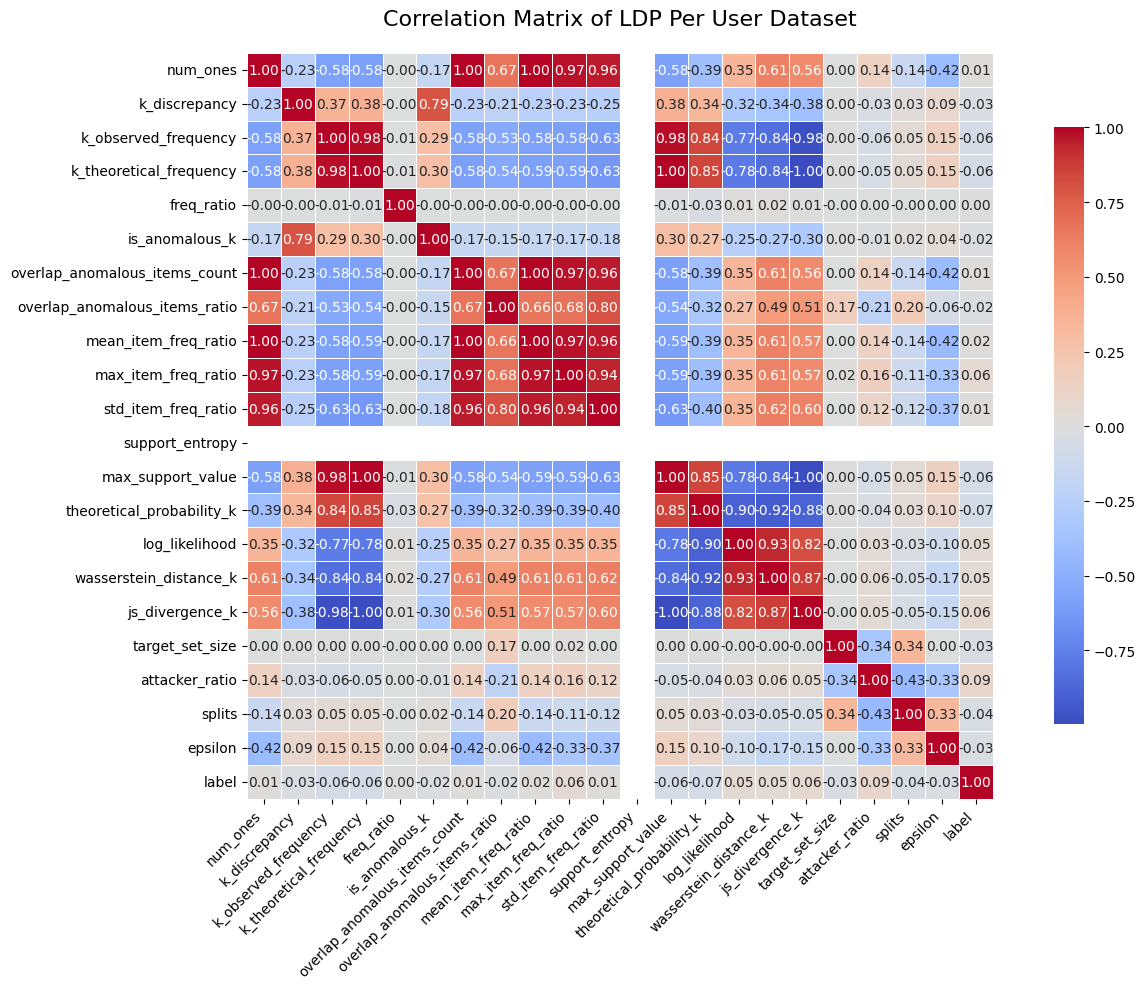

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is already loaded
# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'label' if you want to see it separately, or keep it to see correlations with target
print(f"Numerical columns: {numerical_cols}")

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a larger figure for better readability
plt.figure(figsize=(14, 10))

# Create heatmap with better formatting
sns.heatmap(correlation_matrix,
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme
            fmt=".2f",            # Format to 2 decimal places
            center=0,             # Center colormap at 0
            square=True,          # Make cells square
            linewidths=0.5,       # Add gridlines
            cbar_kws={"shrink": 0.8})  # Adjust colorbar size

plt.title('Correlation Matrix of LDP Per User Dataset', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
columns_to_keep = [
    'num_ones', 'k_discrepancy', 'k_observed_frequency',
    'k_theoretical_frequency', 'freq_ratio', 'is_anomalous_k',
    'overlap_anomalous_items_count', 'overlap_anomalous_items_ratio',
    'mean_item_freq_ratio', 'max_item_freq_ratio', 'std_item_freq_ratio',
    'support_entropy', 'max_support_value',
    'theoretical_probability_k', 'log_likelihood',
    'wasserstein_distance_k', "js_divergence_k",
    'label'  # Keep the target variable
]

Filtered dataset shape: (4800000, 18)
Columns kept: ['num_ones', 'k_discrepancy', 'k_observed_frequency', 'k_theoretical_frequency', 'freq_ratio', 'is_anomalous_k', 'overlap_anomalous_items_count', 'overlap_anomalous_items_ratio', 'mean_item_freq_ratio', 'max_item_freq_ratio', 'std_item_freq_ratio', 'support_entropy', 'max_support_value', 'theoretical_probability_k', 'log_likelihood', 'wasserstein_distance_k', 'js_divergence_k', 'label']


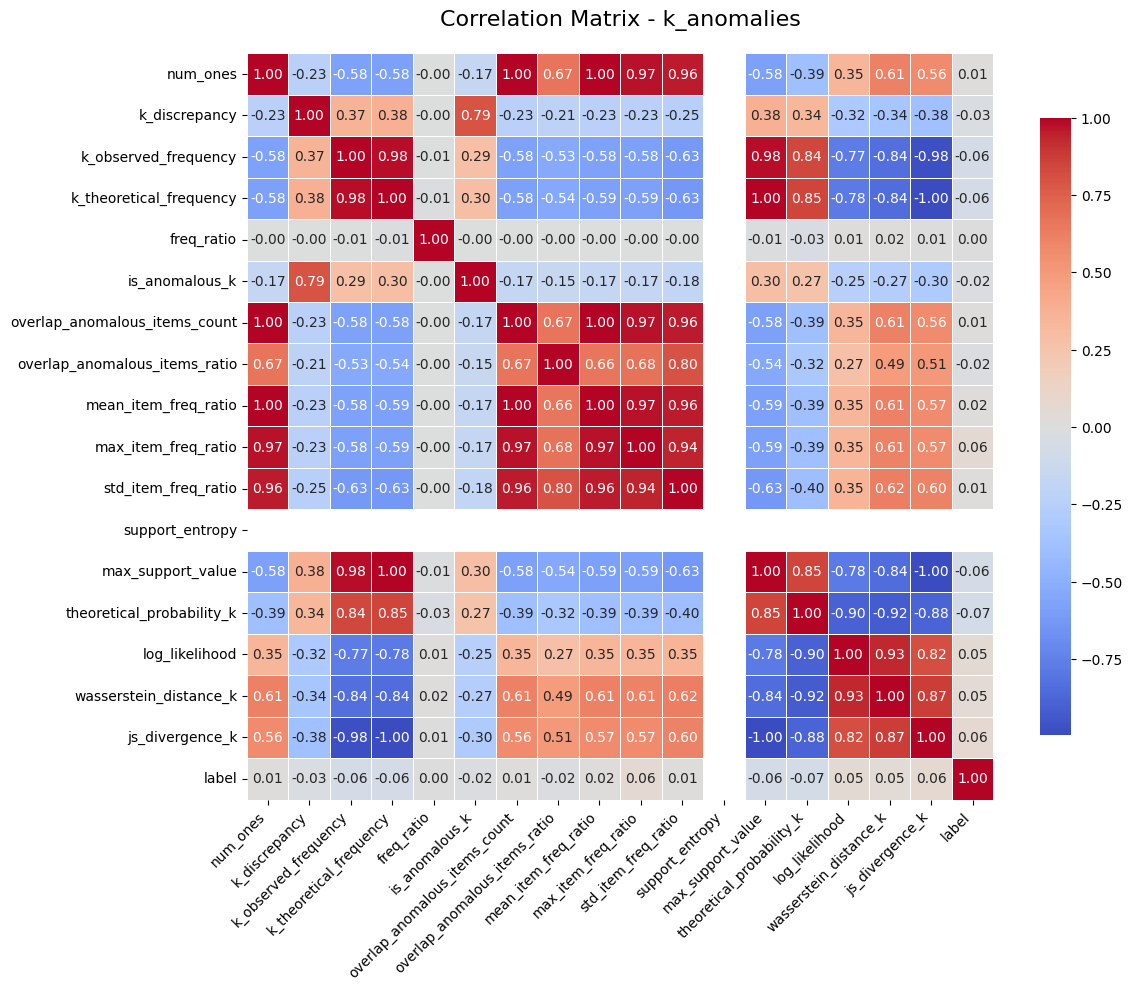

In [ ]:
df_filtered = df[columns_to_keep]

print(f"Filtered dataset shape: {df_filtered.shape}")
print(f"Columns kept: {df_filtered.columns.tolist()}")

# Calculate correlation matrix for filtered data
correlation_matrix = df_filtered.corr()

# Create heatmap
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix - k_anomalies', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Feature importance using RandomForest and XGBoost

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split

# X = df_filtered.drop('label', axis=1)
# y = df_filtered['label']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
# rf.fit(X_train, y_train)

# feature_importance = pd.DataFrame({
#     'feature': X.columns,
#     'importance': rf.feature_importances_
# }).sort_values('importance', ascending=False)

# print("Feature Importance from Random Forest:")
# print(feature_importance)

# # Plot feature importance
# plt.figure(figsize=(10, 6))
# sns.barplot(data=feature_importance, x='importance', y='feature')
# plt.title('Feature Importance (Random Forest)')
# plt.xlabel('Importance')
# plt.tight_layout()
# plt.show()

Feature Importance from XGBoost:
                          feature  importance
8            mean_item_freq_ratio    0.289349
0                        num_ones    0.221664
9             max_item_freq_ratio    0.138011
6   overlap_anomalous_items_count    0.124248
16                js_divergence_k    0.095131
10            std_item_freq_ratio    0.043423
3         k_theoretical_frequency    0.036779
2            k_observed_frequency    0.024990
15         wasserstein_distance_k    0.018276
14                 log_likelihood    0.004729
1                   k_discrepancy    0.002283
4                      freq_ratio    0.001117
5                  is_anomalous_k    0.000000
7   overlap_anomalous_items_ratio    0.000000
11                support_entropy    0.000000
12              max_support_value    0.000000
13      theoretical_probability_k    0.000000


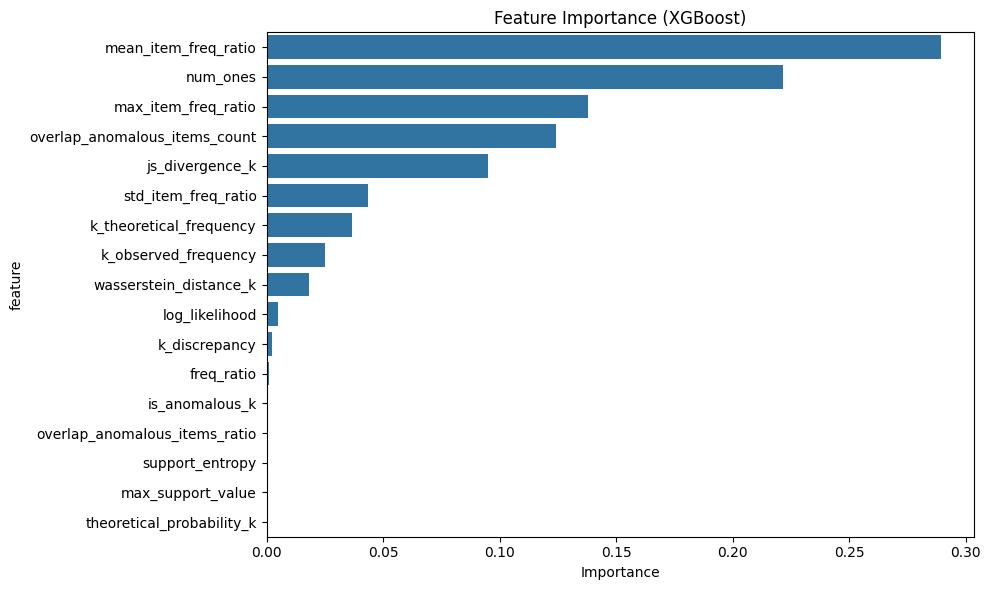

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = df_filtered.drop('label', axis=1)
y = df_filtered['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost with reduced resource usage
xgb_model = xgb.XGBClassifier(
    n_estimators=50,          # Reduced from 100
    max_depth=4,              # Limit tree depth (default is 6)
    learning_rate=0.1,        # Default, can increase to 0.3 for faster training
    subsample=0.8,            # Use 80% of data per tree
    colsample_bytree=0.8,     # Use 80% of features per tree
    n_jobs=2,                 # Limit parallel threads (adjust based on your CPU)
    random_state=42,
    tree_method='hist',       # Faster histogram-based algorithm
    eval_metric='logloss'     # Suppress warning
)

xgb_model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance from XGBoost:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (XGBoost) - K_value')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Top Performing Features (High Importance):

- mean_item_freq_ratio (0.31) - By far the most important! This confirms that attackers concentrate on items that appear more frequently than expected in the attacked distribution.
- num_ones (0.22) - The k-value itself is highly discriminative. Attackers produce different k-value patterns than benign users.
overlap_anomalous_items_count (0.17) - How many anomalous items a user reports is a strong signal.
- max_item_freq_ratio (0.14) - The most suspicious item a user reported matters.
- std_item_freq_ratio (0.09) - Consistency in reporting anomalous items helps distinguish attackers.
- max_support_value (0.05) - Attackers concentrate their reports on fewer items.

# Model

## MLP

### First lets specify the high importance to low importance features

In [ ]:
HIGH_IMPORTANCE_FEATURES = [
    'mean_item_freq_ratio', 'num_ones', 'overlap_anomalous_items_count',
    'wasserstein_distance_k', 'js_divergence_k', 'max_item_freq_ratio',
    'std_item_freq_ratio'
]

# TRAINING FEATURES - Statistical features only
TRAINING_FEATURES = HIGH_IMPORTANCE_FEATURES + [
    'k_theoretical_frequency', 'k_observed_frequency', 'log_likelihood'
]


CONTEXT_FEATURES = ['target_set_size', 'attacker_ratio', 'epsilon']

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class AttackerDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [ ]:
class RobustAttackerDetector(nn.Module):
    def __init__(self, input_dim, dropout_rate=0.2):
        super(RobustAttackerDetector, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.1),
            nn.Dropout(dropout_rate)
        )

        self.layer2 = nn.Sequential(
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.1),
            nn.Dropout(dropout_rate)
        )

        self.layer3 = nn.Sequential(
            nn.Linear(128, 64), nn.BatchNorm1d(64),
            nn.LeakyReLU(0.1), nn.Dropout(dropout_rate/2)
        )

        self.output = nn.Linear(64, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return self.output(x)

In [ ]:
def run_sensitivity_analysis(model, test_df, scaler, feature_cols, device='cpu', batch_size=2048):
    """
    Evaluates model using BATCH PROCESSING to prevent RAM overflow.
    """
    model.eval()
    results = []

    param_map = {
        'epsilon': 'Epsilon ($\\epsilon$)',
        'attacker_ratio': 'Attacker Ratio ($ \\beta$)',
        'target_set_size': 'Target Set Size ($r$)'
    }

    # RAM FIX
    print(f"Predicting on {len(test_df)} samples using batch size {batch_size}...")

    X_raw = test_df[feature_cols].values
    all_probs = []

    # Process in chunks
    for i in range(0, len(X_raw), batch_size):
        batch_raw = X_raw[i : i + batch_size]
        batch_scaled = scaler.transform(batch_raw)
        batch_tensor = torch.FloatTensor(batch_scaled).to(device)

        with torch.no_grad():
            batch_out = torch.sigmoid(model(batch_tensor))
            all_probs.append(batch_out.cpu().numpy().flatten())

        del batch_tensor

    # Concatenate all batch results
    global_probs = np.concatenate(all_probs)
    global_preds = (global_probs > 0.5).astype(int)

    analysis_df = test_df.copy()
    analysis_df['predicted'] = global_preds

    print("Calculating sensitivity metrics...")

    for col_name, display_name in param_map.items():
        if col_name not in analysis_df.columns:
            continue

        unique_vals = sorted(analysis_df[col_name].unique())

        for val in unique_vals:
            # Boolean indexing is faster and lighter than making new DF copies
            mask = analysis_df[col_name] == val

            # If mask is empty, skip
            if not mask.any():
                continue

            y_true = analysis_df.loc[mask, 'label'].values
            y_pred = analysis_df.loc[mask, 'predicted'].values

            # Calculate with zero_division protection
            acc = accuracy_score(y_true, y_pred)
            # precision/recall/f1 warn
            prec = precision_score(y_true, y_pred, zero_division=0)
            rec = recall_score(y_true, y_pred, zero_division=0)
            f1 = f1_score(y_true, y_pred, zero_division=0)

            results.append({
                'Parameter_Type': col_name,
                'Parameter_Label': display_name,
                'Value': val,
                'Accuracy': acc,
                'Precision': prec,
                'Recall': rec,
                'F1_Score': f1,
                'Count': mask.sum()
            })

    return pd.DataFrame(results)

In [ ]:
def plot_sensitivity_metric(sensitivity_df, metric='F1_Score'):
    """
    Plots the specific metric (F1_Score, Accuracy, Precision, or Recall).
    """
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.2)

    params = ['epsilon', 'attacker_ratio', 'target_set_size']
    labels = ['$\epsilon$', '$\\beta$', '$r$']

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    line_color = '#1f77b4'

    for i, param in enumerate(params):
        ax = axes[i]
        data = sensitivity_df[sensitivity_df['Parameter_Type'] == param]

        if len(data) == 0:
            ax.set_title(f"No data for {param}")
            continue

        ax.plot(data['Value'], data[metric],
                marker='X', markersize=8,
                linestyle='--', linewidth=2,
                color=line_color, label='Proposed DL Model')

        ax.set_xlabel(labels[i], fontsize=14, fontweight='bold')
        if i == 0:
            ax.set_ylabel(metric.replace('_', ' '), fontsize=14, fontweight='bold')

        ax.set_ylim(-0.05, 1.05)

        if param == 'target_set_size':
            ax.set_xticks(data['Value'].unique())

        ax.legend(loc='lower right')
        ax.grid(True, alpha=0.3)

    plt.suptitle(f"Impact of Parameters on {metric.replace('_', ' ')}", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-3819223228.py:9: SyntaxWarning: invalid escape sequence '\e'
  labels = ['$\epsilon$', '$\\beta$', '$r$']


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [ ]:
print(f"\nTraining features ({len(TRAINING_FEATURES)}): {TRAINING_FEATURES}")

print(f"Train test split")



X = df[TRAINING_FEATURES].values
y = df['label'].values

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Training features (10): ['mean_item_freq_ratio', 'num_ones', 'overlap_anomalous_items_count', 'wasserstein_distance_k', 'js_divergence_k', 'max_item_freq_ratio', 'std_item_freq_ratio', 'k_theoretical_frequency', 'k_observed_frequency', 'log_likelihood']
Train test split


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [ ]:
train_dataset = AttackerDataset(X_train, y_train)
test_dataset = AttackerDataset(X_test, y_test)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

In [ ]:
model = RobustAttackerDetector(len(TRAINING_FEATURES)).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_benign = (y_train == 0).sum()
num_attackers = (y_train == 1).sum()
ratio = num_benign / max(num_attackers, 1)
print(f"\nClass Imbalance Ratio: 1 Attacker : {ratio:.2f} Benign")

pos_weight = torch.tensor([ratio]).float().to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# Train
print("\nStarting Training...")
for epoch in range(5):
    model.train()
    for features, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        features = features.to(device)
        labels = labels.to(device).unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()



Class Imbalance Ratio: 1 Attacker : 5.15 Benign

Starting Training...


Epoch 5: 100%|██████████| 15000/15000 [03:00<00:00, 83.22it/s]



Running Sensitivity Analysis...
Predicting on 960000 samples using batch size 4096...
Calculating sensitivity metrics...

Plotting results...


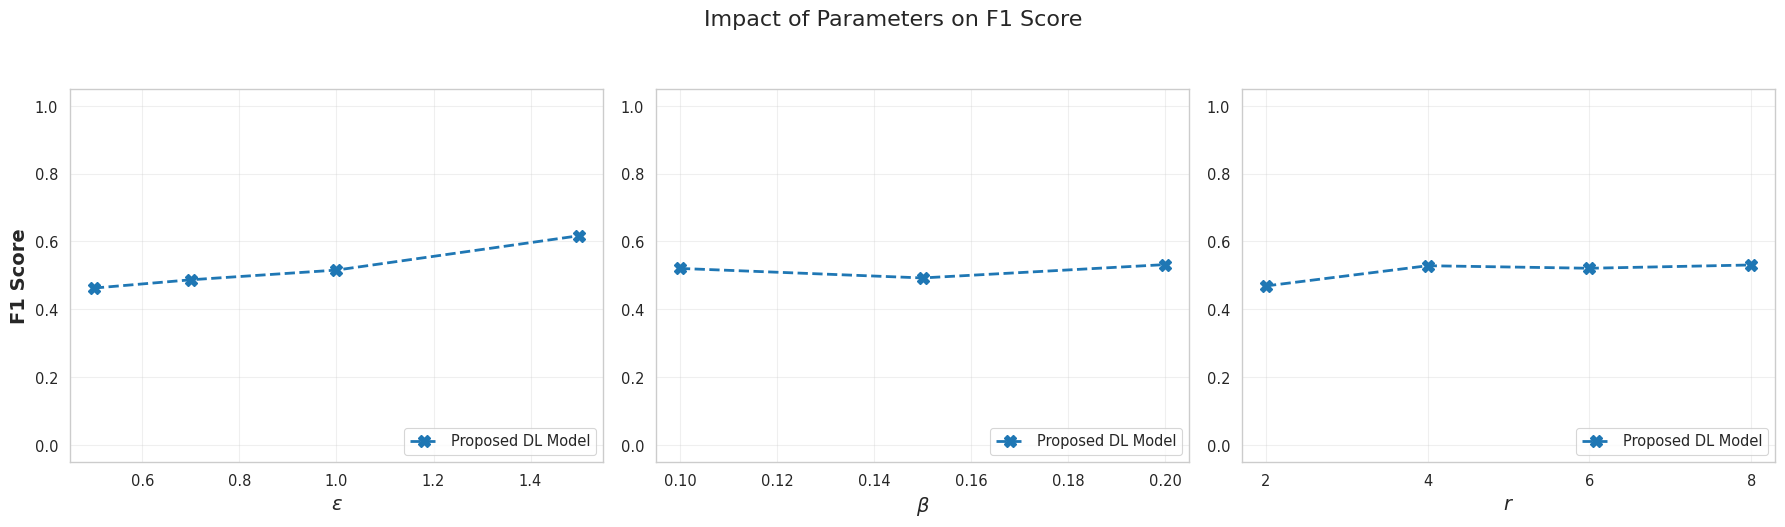

In [ ]:
print("\nRunning Sensitivity Analysis...")

# Get test indices to extract corresponding rows from original df
test_indices = train_test_split(
    range(len(df)), test_size=0.2, random_state=42, stratify=y
)[1]

df_test = df.iloc[test_indices].reset_index(drop=True)

# Run sensitivity analysis
sens_df = run_sensitivity_analysis(
    model,
    df_test,
    scaler,
    TRAINING_FEATURES,
    device,
    batch_size=4096
)

print("\nPlotting results...")
plot_sensitivity_metric(sens_df, metric='F1_Score')

## Approach: 2 GAN based

Label_1s are trying to mimic label_0s. So a powerful discriminitaor might capture their behavior

In [ ]:
class AttackerDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [ ]:

class AttackerDiscriminator(nn.Module):
    """
    GAN-style discriminator that learns the boundary between
    genuine benign behavior and attacker imitations.
    """
    def __init__(self, input_dim, dropout_rate=0.2):
        super(AttackerDiscriminator, self).__init__()


        self.feature_extractor = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LayerNorm(128),
            nn.LeakyReLU(0.2),
            nn.Dropout(dropout_rate),

            nn.Linear(128, 64),
            nn.LayerNorm(64),
            nn.LeakyReLU(0.2),
            nn.Dropout(dropout_rate)
        )

        self.discriminator = nn.Sequential(
            nn.Linear(64, 32),
            nn.LeakyReLU(0.2),
            nn.Dropout(dropout_rate / 2),
            nn.Linear(32, 1)

        )

    def forward(self, x):
        features = self.feature_extractor(x)
        return self.discriminator(features)

In [ ]:
def train_discriminator(model, train_loader, num_epochs=10, lr=0.0002, device='cpu'):
    """
    Train GAN-style discriminator with adversarial loss weighting.
    """
    optimizer = optim.Adam(model.parameters(), lr=lr, betas=(0.5, 0.999))

    # Calculate class weights for imbalance
    num_benign = sum([(labels == 0).sum().item() for _, labels in train_loader])
    num_attackers = sum([(labels == 1).sum().item() for _, labels in train_loader])
    ratio = num_benign / max(num_attackers, 1)
    pos_weight = torch.tensor([ratio]).to(device)

    print(f"Class Imbalance Ratio: 1 Attacker : {ratio:.2f} Benign")

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for features, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            features, labels = features.to(device), labels.to(device).unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

    return model

In [ ]:
def run_sensitivity_analysis(model, test_df, scaler, feature_cols, device='cpu', batch_size=2048):
    """
    Evaluates model using BATCH PROCESSING to prevent RAM overflow.

    Args:
        model: Trained PyTorch model
        test_df: DataFrame with features + context columns (epsilon, attacker_ratio, target_set_size)
        scaler: Fitted StandardScaler
        feature_cols: List of feature names used for training (NO configs)
        device: 'cpu' or 'cuda'
        batch_size: Number of samples per batch
    """
    model.eval()
    results = []

    param_map = {
        'epsilon': 'Epsilon ($\\epsilon$)',
        'attacker_ratio': 'Attacker Ratio ($\\beta$)',
        'target_set_size': 'Target Set Size ($r$)'
    }

    print(f"Predicting on {len(test_df)} samples using batch size {batch_size}...")

    X_raw = test_df[feature_cols].values
    all_probs = []

    # Process in chunks
    for i in range(0, len(X_raw), batch_size):
        batch_raw = X_raw[i : i + batch_size]
        batch_scaled = scaler.transform(batch_raw)
        batch_tensor = torch.FloatTensor(batch_scaled).to(device)

        with torch.no_grad():
            batch_out = torch.sigmoid(model(batch_tensor))
            all_probs.append(batch_out.cpu().numpy().flatten())

        del batch_tensor


    global_probs = np.concatenate(all_probs)
    global_preds = (global_probs > 0.5).astype(int)

    analysis_df = test_df.copy()
    analysis_df['predicted'] = global_preds


    print("Calculating sensitivity metrics...")

    for col_name, display_name in param_map.items():
        if col_name not in analysis_df.columns:
            continue

        unique_vals = sorted(analysis_df[col_name].unique())

        for val in unique_vals:

            mask = analysis_df[col_name] == val

            if not mask.any():
                continue

            y_true = analysis_df.loc[mask, 'label'].values
            y_pred = analysis_df.loc[mask, 'predicted'].values

            acc = accuracy_score(y_true, y_pred)
            prec = precision_score(y_true, y_pred, zero_division=0)
            rec = recall_score(y_true, y_pred, zero_division=0)
            f1 = f1_score(y_true, y_pred, zero_division=0)

            results.append({
                'Parameter_Type': col_name,
                'Parameter_Label': display_name,
                'Value': val,
                'Accuracy': acc,
                'Precision': prec,
                'Recall': rec,
                'F1_Score': f1,
                'Count': mask.sum()
            })

    return pd.DataFrame(results)

In [ ]:
def plot_sensitivity_metric(sensitivity_df, metric='F1_Score'):

    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.2)

    params = ['epsilon', 'attacker_ratio', 'target_set_size']
    labels = ['$\\epsilon$', '$\\beta$', '$r$']

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    line_color = '#1f77b4'

    for i, param in enumerate(params):
        ax = axes[i]
        data = sensitivity_df[sensitivity_df['Parameter_Type'] == param]

        if len(data) == 0:
            ax.set_title(f"No data for {param}")
            continue

        ax.plot(data['Value'], data[metric],
                marker='X', markersize=8,
                linestyle='--', linewidth=2,
                color=line_color, label='GAN Discriminator Model')

        ax.set_xlabel(labels[i], fontsize=14, fontweight='bold')
        if i == 0:
            ax.set_ylabel(metric.replace('_', ' '), fontsize=14, fontweight='bold')

        ax.set_ylim(-0.05, 1.05)

        if param == 'target_set_size':
            ax.set_xticks(data['Value'].unique())

        ax.legend(loc='lower right')
        ax.grid(True, alpha=0.3)

    plt.suptitle(f"Impact of Parameters on {metric.replace('_', ' ')}", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

print(f"\nTraining features ({len(TRAINING_FEATURES)}): {TRAINING_FEATURES}")
print(f"Context features (for analysis only): {CONTEXT_FEATURES}")

print(f"\nTrain test split...")

X = df[TRAINING_FEATURES].values
y = df['label'].values

Using device: cpu

Training features (10): ['mean_item_freq_ratio', 'num_ones', 'overlap_anomalous_items_count', 'wasserstein_distance_k', 'js_divergence_k', 'max_item_freq_ratio', 'std_item_freq_ratio', 'k_theoretical_frequency', 'k_observed_frequency', 'log_likelihood']
Context features (for analysis only): ['target_set_size', 'attacker_ratio', 'epsilon']

Train test split...


In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)


In [ ]:
train_dataset = AttackerDataset(X_train, y_train)
test_dataset = AttackerDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

In [ ]:
print(f"\nInitializing GAN-Inspired Discriminator...")
model = AttackerDiscriminator(input_dim=len(TRAINING_FEATURES), dropout_rate=0.2).to(device)

# Train Model
print("\nStarting Training...")
model = train_discriminator(
    model,
    train_loader,
    num_epochs=10,
    lr=0.0002,
    device=device
)


Initializing GAN-Inspired Discriminator...

Starting Training...
Class Imbalance Ratio: 1 Attacker : 5.15 Benign


Epoch 1/10: 100%|██████████| 15000/15000 [02:04<00:00, 120.25it/s]


Epoch 1/10, Loss: 1.0206


Epoch 2/10: 100%|██████████| 15000/15000 [01:59<00:00, 125.17it/s]


Epoch 2/10, Loss: 0.9932


Epoch 3/10: 100%|██████████| 15000/15000 [01:59<00:00, 125.93it/s]


Epoch 3/10, Loss: 0.9844


Epoch 4/10: 100%|██████████| 15000/15000 [02:15<00:00, 110.80it/s]


Epoch 4/10, Loss: 0.9780


Epoch 5/10: 100%|██████████| 15000/15000 [02:08<00:00, 116.79it/s]


Epoch 5/10, Loss: 0.9733


Epoch 6/10: 100%|██████████| 15000/15000 [02:47<00:00, 89.55it/s]


Epoch 6/10, Loss: 0.9682


Epoch 7/10: 100%|██████████| 15000/15000 [02:42<00:00, 92.10it/s] 


Epoch 7/10, Loss: 0.9624


Epoch 8/10: 100%|██████████| 15000/15000 [02:38<00:00, 94.87it/s] 


Epoch 8/10, Loss: 0.9539


Epoch 9/10: 100%|██████████| 15000/15000 [02:03<00:00, 121.81it/s]


Epoch 9/10, Loss: 0.9420


Epoch 10/10: 100%|██████████| 15000/15000 [02:04<00:00, 120.62it/s]

Epoch 10/10, Loss: 0.9249



RUNNING SENSITIVITY ANALYSIS
Predicting on 960000 samples using batch size 4096...
Calculating sensitivity metrics...

SENSITIVITY ANALYSIS RESULTS
     Parameter_Type           Parameter_Label  Value  Accuracy  Precision    Recall  F1_Score   Count
0           epsilon      Epsilon ($\epsilon$)   0.50  0.579488   0.264383  0.788548  0.395997  239960
1           epsilon      Epsilon ($\epsilon$)   0.70  0.592349   0.276427  0.820829  0.413576  239823
2           epsilon      Epsilon ($\epsilon$)   1.00  0.696975   0.302315  0.778570  0.435520  240175
3           epsilon      Epsilon ($\epsilon$)   1.50  0.747702   0.360185  0.879307  0.511037  240042
4    attacker_ratio  Attacker Ratio ($\beta$)   0.10  0.854161   0.347556  0.532654  0.420643  119543
5    attacker_ratio  Attacker Ratio ($\beta$)   0.15  0.705744   0.302620  0.734343  0.428611  480548
6    attacker_ratio  Attacker Ratio ($\beta$)   0.20  0.518842   0.286428  0.944573  0.439564  359909
7   target_set_size     Target Set 

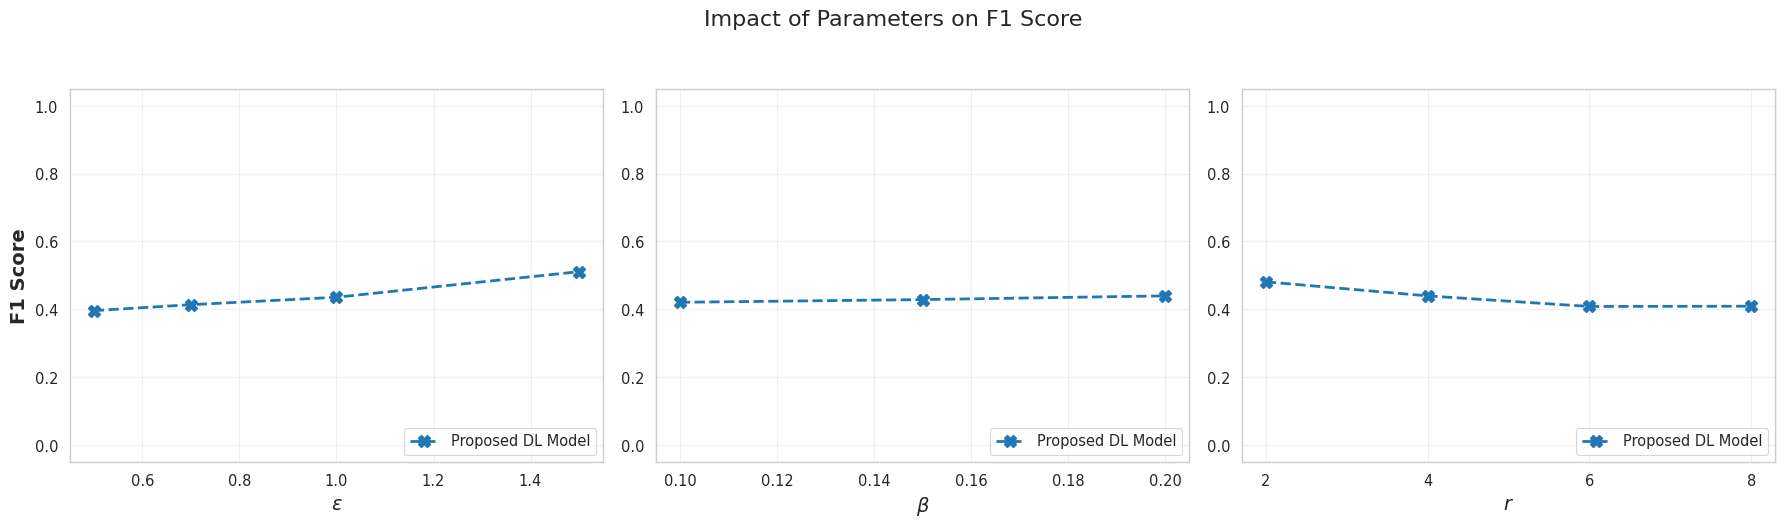


Plotting Accuracy...


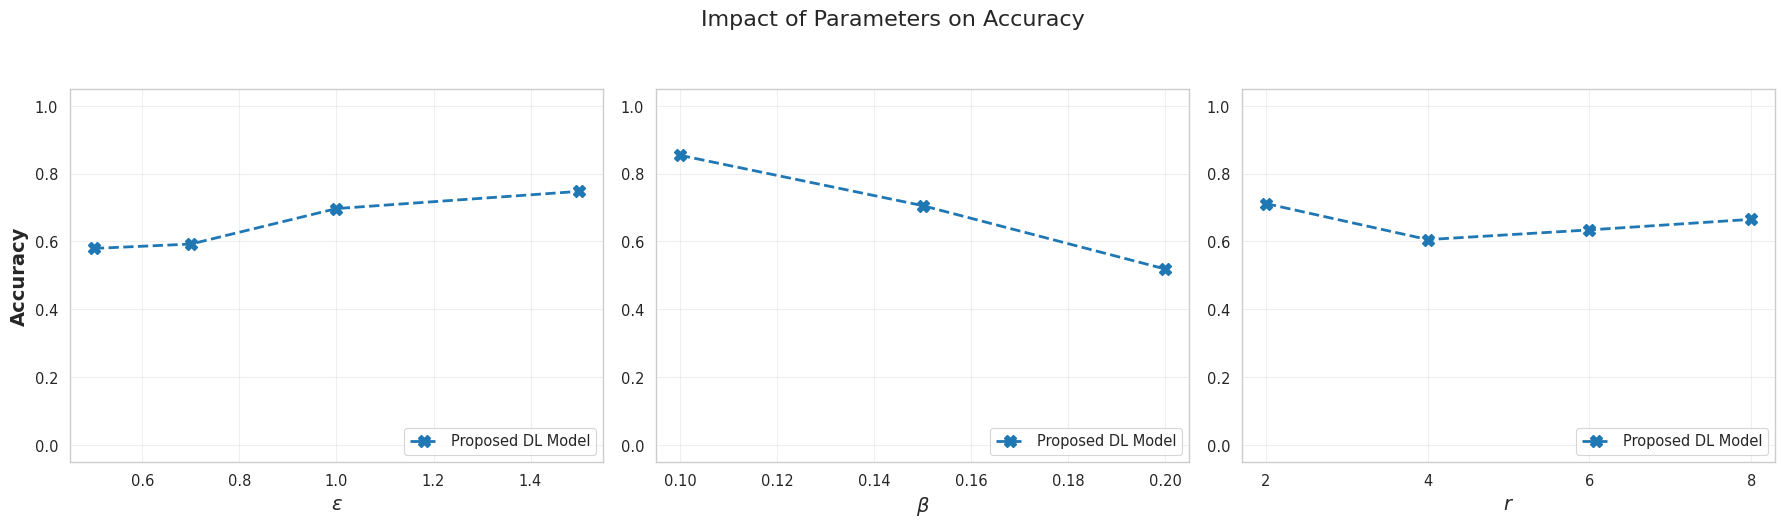


Plotting Precision...


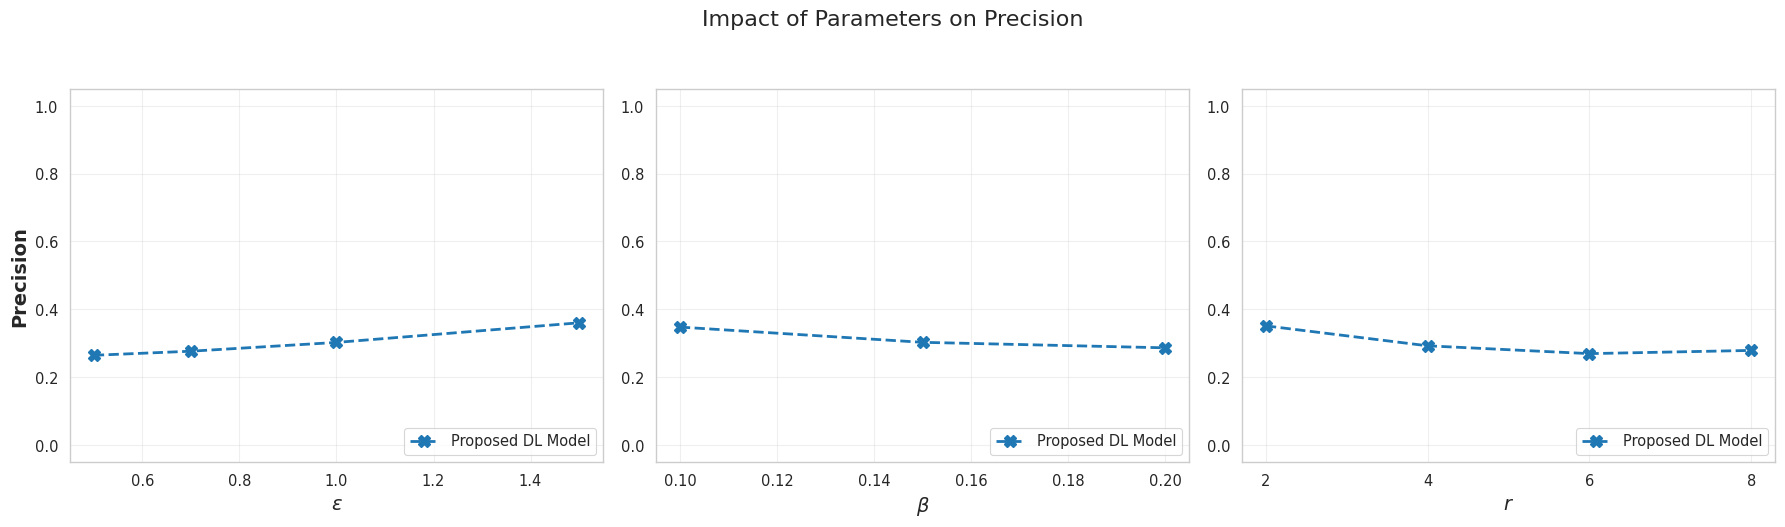


Plotting Recall...


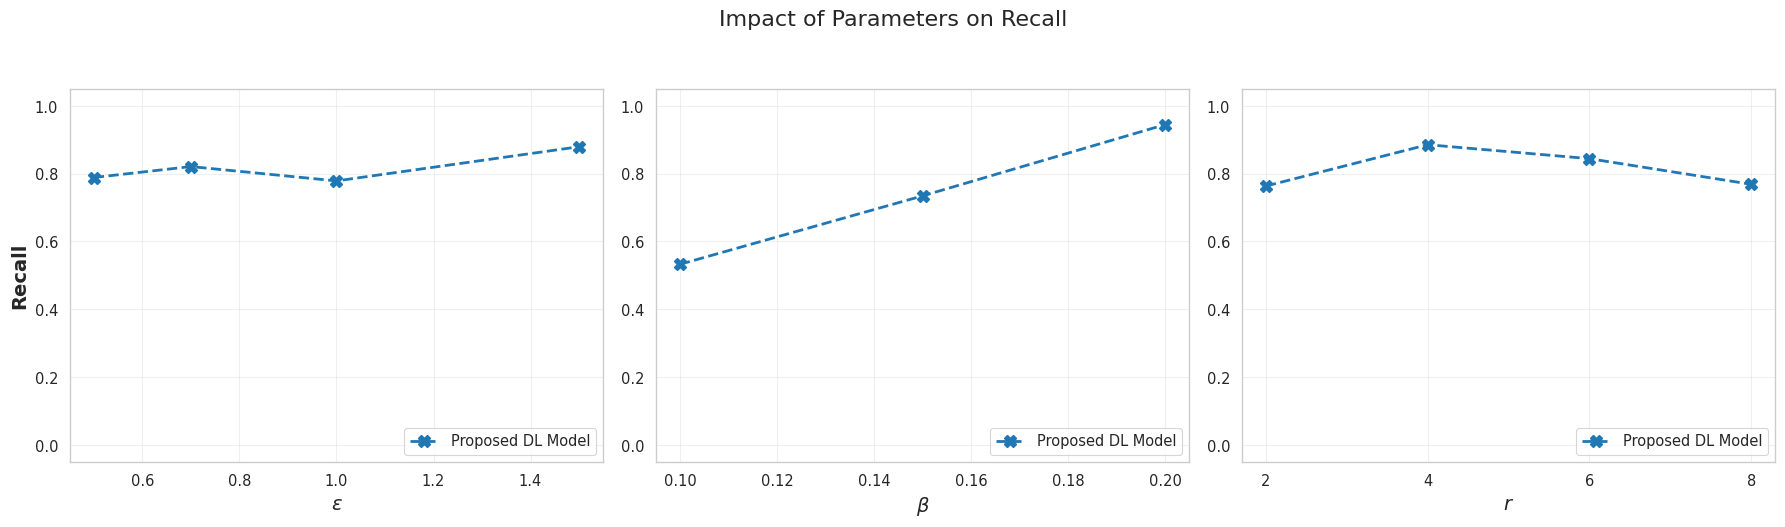

In [ ]:
test_indices = train_test_split(
    range(len(df)), test_size=0.2, random_state=42, stratify=y
)[1]

df_test = df.iloc[test_indices].reset_index(drop=True)

sens_df = run_sensitivity_analysis(
    model,
    df_test,
    scaler,
    TRAINING_FEATURES,
    device,
    batch_size=4096
)


print("\n" + "="*70)
print("SENSITIVITY ANALYSIS RESULTS")
print("="*70)
print(sens_df.to_string())


print("\nPlotting F1-Score...")
plot_sensitivity_metric(sens_df, metric='F1_Score')

print("\nPlotting Accuracy...")
plot_sensitivity_metric(sens_df, metric='Accuracy')

print("\nPlotting Precision...")
plot_sensitivity_metric(sens_df, metric='Precision')

print("\nPlotting Recall...")
plot_sensitivity_metric(sens_df, metric='Recall')

## Approach 3: Attention Based

Automatically learns which features matter most for detection
Different "attention heads" focus on different attack patterns:

Head 1: Frequency anomalies
Head 2: Distribution divergence
Head 3: Overlap patterns
Head 4: Statistical outliers

In [ ]:
class AttackerDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]


In [ ]:
class MultiHeadAttention(nn.Module):
    """
    Multi-head attention to capture different aspects of attack patterns.
    """
    def __init__(self, d_model, num_heads=4):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)

    def forward(self, x):
        batch_size = x.size(0)

        # Construct Key and Values
        Q = self.W_q(x).view(batch_size, self.num_heads, self.d_k)
        K = self.W_k(x).view(batch_size, self.num_heads, self.d_k)
        V = self.W_v(x).view(batch_size, self.num_heads, self.d_k)

        scores = torch.matmul(Q, K.transpose(-2, -1)) / np.sqrt(self.d_k)
        attn_weights = torch.softmax(scores, dim=-1)
        attn_output = torch.matmul(attn_weights, V)

        attn_output = attn_output.view(batch_size, self.d_model)
        return self.W_o(attn_output), attn_weights


In [ ]:
class AttentionAttackerDetector(nn.Module):
    """
    Attention-based network that learns which feature patterns
    are most indicative of attackers vs benign users.
    """
    def __init__(self, num_features, d_model=128, num_heads=4, dropout_rate=0.2):
        super(AttentionAttackerDetector, self).__init__()

        # Each feature gets its own embedding layer
        self.feature_embeddings = nn.ModuleList([
            nn.Linear(1, d_model) for _ in range(num_features)
        ])

        # CLS token for classification (like BERT's [CLS] token)
        self.cls_token = nn.Parameter(torch.zeros(1, 1, d_model))

        self.attention = nn.MultiheadAttention(
            embed_dim=d_model,
            num_heads=num_heads,
            dropout=dropout_rate,
            batch_first=True
        )

        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)

        # Feed-forward network
        self.ffn = nn.Sequential(
            nn.Linear(d_model, d_model * 2),
            nn.GELU(),
            nn.Dropout(dropout_rate),
            nn.Linear(d_model * 2, d_model),
            nn.Dropout(dropout_rate)
        )

        # Classification head
        self.classifier = nn.Sequential(
            nn.LayerNorm(d_model),
            nn.Linear(d_model, 64),
            nn.GELU(),
            nn.Dropout(dropout_rate),
            nn.Linear(64, 1)
        )

    def forward(self, x, return_attention=False):
        batch_size = x.shape[0]

        tokens = []
        for i, layer in enumerate(self.feature_embeddings):
            col_data = x[:, i:i+1]
            token = layer(col_data)
            tokens.append(token.unsqueeze(1)) # [Batch, 1, d_model] <- 3D!

        x_emb = torch.cat(tokens, dim=1)
        cls_tokens = self.cls_token.expand(batch_size, -1, -1)
        x_seq = torch.cat((cls_tokens, x_emb), dim=1)

        attn_out, attn_weights = self.attention(x_seq, x_seq, x_seq)

        x_seq = self.norm1(x_seq + attn_out)

        ffn_out = self.ffn(x_seq)
        x_seq = self.norm2(x_seq + ffn_out)

        cls_final = x_seq[:, 0, :]

        output = self.classifier(cls_final)

        if return_attention:
            return output, attn_weights

        return output



In [ ]:
def train_attention_model(model, train_loader, num_epochs=10, lr=0.001, device='cpu'):
    """
    Train attention-based model with AdamW optimizer and cosine annealing.
    """
    # AdamW is better for transformers (includes weight decay)
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=0.01)

    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

    # Calculate class weights for imbalance
    num_benign = sum([(labels == 0).sum().item() for _, labels in train_loader])
    num_attackers = sum([(labels == 1).sum().item() for _, labels in train_loader])
    ratio = num_benign / max(num_attackers, 1)
    pos_weight = torch.tensor([ratio]).to(device)

    print(f"Class Imbalance Ratio: 1 Attacker : {ratio:.2f} Benign")

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for features, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            features, labels = features.to(device), labels.to(device).unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()
            total_loss += loss.item()

        # Update learning rate
        scheduler.step()

        avg_loss = total_loss / len(train_loader)
        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, LR: {current_lr:.6f}")

    return model

In [ ]:
def run_sensitivity_analysis(model, test_df, scaler, feature_cols, device='cpu', batch_size=2048):
    model.eval()
    results = []

    param_map = {
        'epsilon': 'Epsilon ($\\epsilon$)',
        'attacker_ratio': 'Attacker Ratio ($\\beta$)',
        'target_set_size': 'Target Set Size ($r$)'
    }

    print(f"Predicting on {len(test_df)} samples using batch size {batch_size}...")

    X_raw = test_df[feature_cols].values
    all_probs = []

    # Process in chunks
    for i in range(0, len(X_raw), batch_size):
        batch_raw = X_raw[i : i + batch_size]
        batch_scaled = scaler.transform(batch_raw)
        batch_tensor = torch.FloatTensor(batch_scaled).to(device)

        with torch.no_grad():
            batch_out = torch.sigmoid(model(batch_tensor))
            all_probs.append(batch_out.cpu().numpy().flatten())

        del batch_tensor

    global_probs = np.concatenate(all_probs)
    global_preds = (global_probs > 0.5).astype(int)

    analysis_df = test_df.copy()
    analysis_df['predicted'] = global_preds

    print("Calculating sensitivity metrics...")

    for col_name, display_name in param_map.items():
        if col_name not in analysis_df.columns:
            continue

        unique_vals = sorted(analysis_df[col_name].unique())

        for val in unique_vals:
            mask = analysis_df[col_name] == val

            if not mask.any():
                continue

            y_true = analysis_df.loc[mask, 'label'].values
            y_pred = analysis_df.loc[mask, 'predicted'].values

            acc = accuracy_score(y_true, y_pred)
            prec = precision_score(y_true, y_pred, zero_division=0)
            rec = recall_score(y_true, y_pred, zero_division=0)
            f1 = f1_score(y_true, y_pred, zero_division=0)

            results.append({
                'Parameter_Type': col_name,
                'Parameter_Label': display_name,
                'Value': val,
                'Accuracy': acc,
                'Precision': prec,
                'Recall': rec,
                'F1_Score': f1,
                'Count': mask.sum()
            })

    return pd.DataFrame(results)


In [ ]:
def plot_sensitivity_metric(sensitivity_df, metric='F1_Score'):

    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.2)

    params = ['epsilon', 'attacker_ratio', 'target_set_size']
    labels = ['$\\epsilon$', '$\\beta$', '$r$']

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    line_color = '#1f77b4'

    for i, param in enumerate(params):
        ax = axes[i]
        data = sensitivity_df[sensitivity_df['Parameter_Type'] == param]

        if len(data) == 0:
            ax.set_title(f"No data for {param}")
            continue

        ax.plot(data['Value'], data[metric],
                marker='o', markersize=8,
                linestyle='-', linewidth=2,
                color=line_color, label='Attention Model')

        ax.set_xlabel(labels[i], fontsize=14, fontweight='bold')
        if i == 0:
            ax.set_ylabel(metric.replace('_', ' '), fontsize=14, fontweight='bold')

        ax.set_ylim(-0.05, 1.05)

        if param == 'target_set_size':
            ax.set_xticks(data['Value'].unique())

        ax.legend(loc='lower right')
        ax.grid(True, alpha=0.3)

    plt.suptitle(f"Impact of Parameters on {metric.replace('_', ' ')} (Attention Model)",
                 fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

print(f"\nTraining features ({len(TRAINING_FEATURES)}): {TRAINING_FEATURES}")
print(f"Context features (for analysis only): {CONTEXT_FEATURES}")

print(f"\nTrain test split...")

X = df[TRAINING_FEATURES].values
y = df['label'].values

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Using device: cpu

Training features (10): ['mean_item_freq_ratio', 'num_ones', 'overlap_anomalous_items_count', 'wasserstein_distance_k', 'js_divergence_k', 'max_item_freq_ratio', 'std_item_freq_ratio', 'k_theoretical_frequency', 'k_observed_frequency', 'log_likelihood']
Context features (for analysis only): ['target_set_size', 'attacker_ratio', 'epsilon']

Train test split...


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# Create datasets
train_dataset = AttackerDataset(X_train, y_train)
test_dataset = AttackerDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

In [ ]:
print(f"\nInitializing Attention-Based Detector...")
model = AttentionAttackerDetector(
    num_features=len(TRAINING_FEATURES),
    d_model=128,
    num_heads=4,
    dropout_rate=0.2
).to(device)

print(f"Model Parameters: {sum(p.numel() for p in model.parameters()):,}")

# Train Model
print("\nStarting Training...")
model = train_attention_model(
    model,
    train_loader,
    num_epochs=15,
    lr=0.001,
    device=device
)


Initializing Attention-Based Detector...
Model Parameters: 143,745

Starting Training...
Class Imbalance Ratio: 1 Attacker : 5.15 Benign


Epoch 1/15: 100%|██████████| 15000/15000 [32:26<00:00,  7.71it/s]


Epoch 1/15, Loss: 1.0237, LR: 0.000989


Epoch 2/15: 100%|██████████| 15000/15000 [40:49<00:00,  6.12it/s]


Epoch 2/15, Loss: 0.9947, LR: 0.000957


Epoch 3/15: 100%|██████████| 15000/15000 [38:36<00:00,  6.47it/s]


Epoch 3/15, Loss: 0.9868, LR: 0.000905


Epoch 4/15: 100%|██████████| 15000/15000 [33:40<00:00,  7.42it/s]


Epoch 4/15, Loss: 0.9828, LR: 0.000835


Epoch 5/15: 100%|██████████| 15000/15000 [32:42<00:00,  7.64it/s]


Epoch 5/15, Loss: 0.9810, LR: 0.000750


Epoch 6/15: 100%|██████████| 15000/15000 [32:55<00:00,  7.59it/s]


Epoch 6/15, Loss: 0.9785, LR: 0.000655


Epoch 7/15: 100%|██████████| 15000/15000 [33:02<00:00,  7.56it/s]


Epoch 7/15, Loss: 0.9752, LR: 0.000552


Epoch 8/15: 100%|██████████| 15000/15000 [33:05<00:00,  7.55it/s]


Epoch 8/15, Loss: 0.9693, LR: 0.000448


Epoch 9/15: 100%|██████████| 15000/15000 [38:40<00:00,  6.46it/s]


Epoch 9/15, Loss: 0.9550, LR: 0.000345


Epoch 10/15: 100%|██████████| 15000/15000 [36:20<00:00,  6.88it/s]


Epoch 10/15, Loss: 0.9465, LR: 0.000250


Epoch 11/15: 100%|██████████| 15000/15000 [35:28<00:00,  7.05it/s]


Epoch 11/15, Loss: 0.9379, LR: 0.000165


Epoch 12/15: 100%|██████████| 15000/15000 [37:03<00:00,  6.75it/s]


Epoch 12/15, Loss: 0.9298, LR: 0.000095


Epoch 13/15: 100%|██████████| 15000/15000 [37:41<00:00,  6.63it/s]


Epoch 13/15, Loss: 0.9218, LR: 0.000043


Epoch 14/15: 100%|██████████| 15000/15000 [37:50<00:00,  6.61it/s]


Epoch 14/15, Loss: 0.9155, LR: 0.000011


Epoch 15/15: 100%|██████████| 15000/15000 [37:39<00:00,  6.64it/s]

Epoch 15/15, Loss: 0.9115, LR: 0.000000


Predicting on 960000 samples using batch size 4096...
Calculating sensitivity metrics...

SENSITIVITY ANALYSIS RESULTS
     Parameter_Type           Parameter_Label  Value  Accuracy  Precision    Recall  F1_Score   Count
0           epsilon      Epsilon ($\epsilon$)   0.50  0.563469   0.249861  0.747735  0.374560  239960
1           epsilon      Epsilon ($\epsilon$)   0.70  0.613878   0.271800  0.717517  0.394254  239823
2           epsilon      Epsilon ($\epsilon$)   1.00  0.671169   0.267009  0.681928  0.383758  240175
3           epsilon      Epsilon ($\epsilon$)   1.50  0.713246   0.325010  0.847355  0.469818  240042
4    attacker_ratio  Attacker Ratio ($\beta$)   0.10  0.800582   0.288079  0.683976  0.405407  119543
5    attacker_ratio  Attacker Ratio ($\beta$)   0.15  0.690125   0.276209  0.655294  0.388616  480548
6    attacker_ratio  Attacker Ratio ($\beta$)   0.20  0.520957   0.274417  0.850341  0.414930  359909
7   target_set_size     Target Set Size ($r$)   2.00  0.709516   

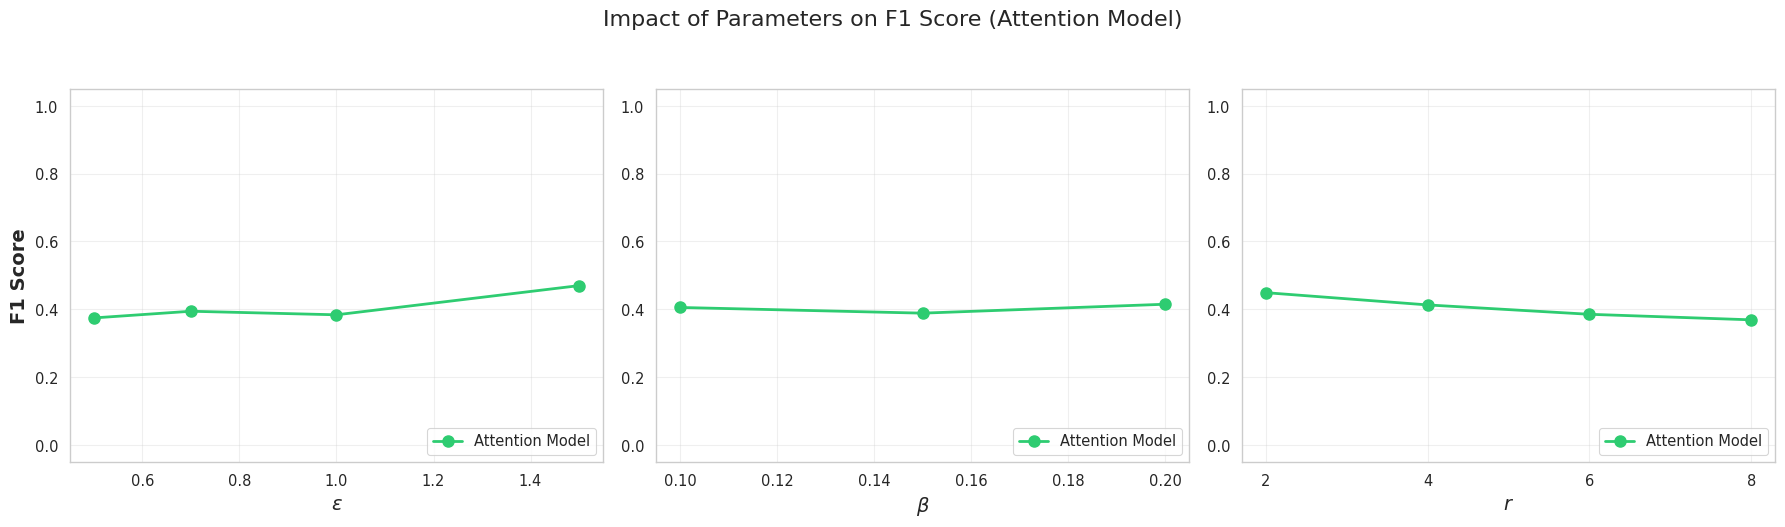


Plotting Accuracy...


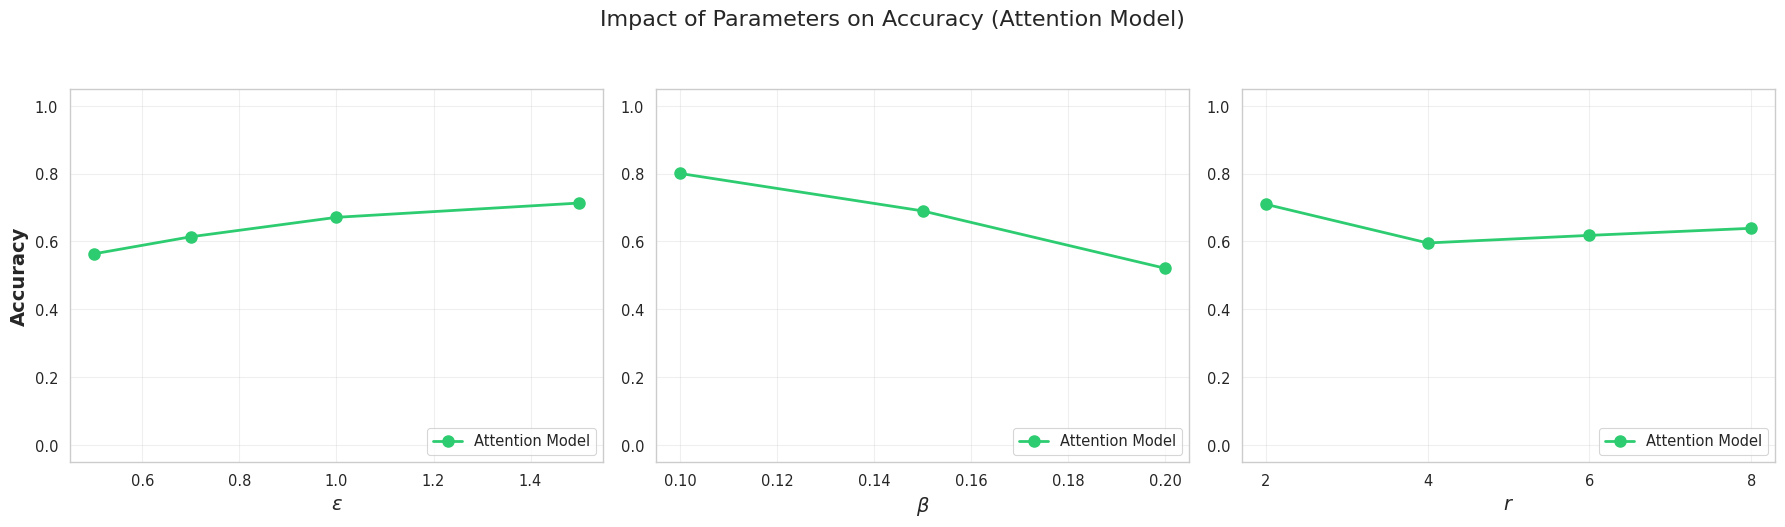


Plotting Precision...


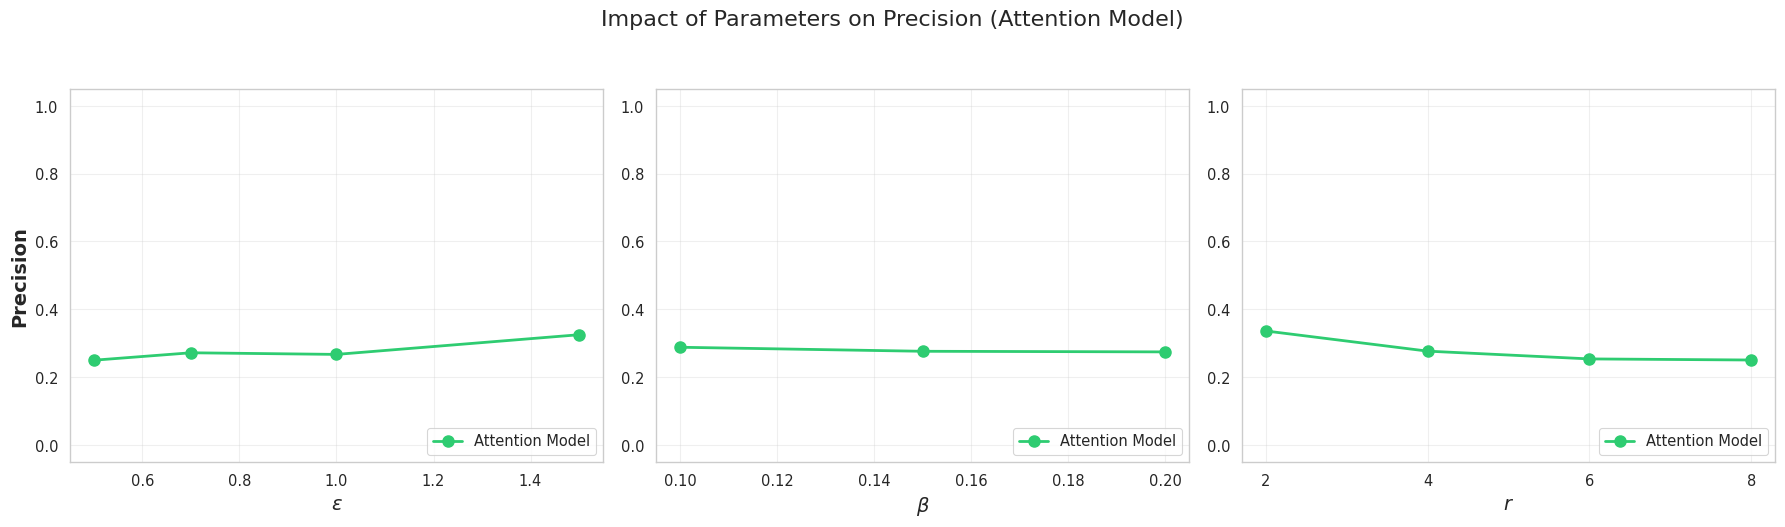


Plotting Recall...


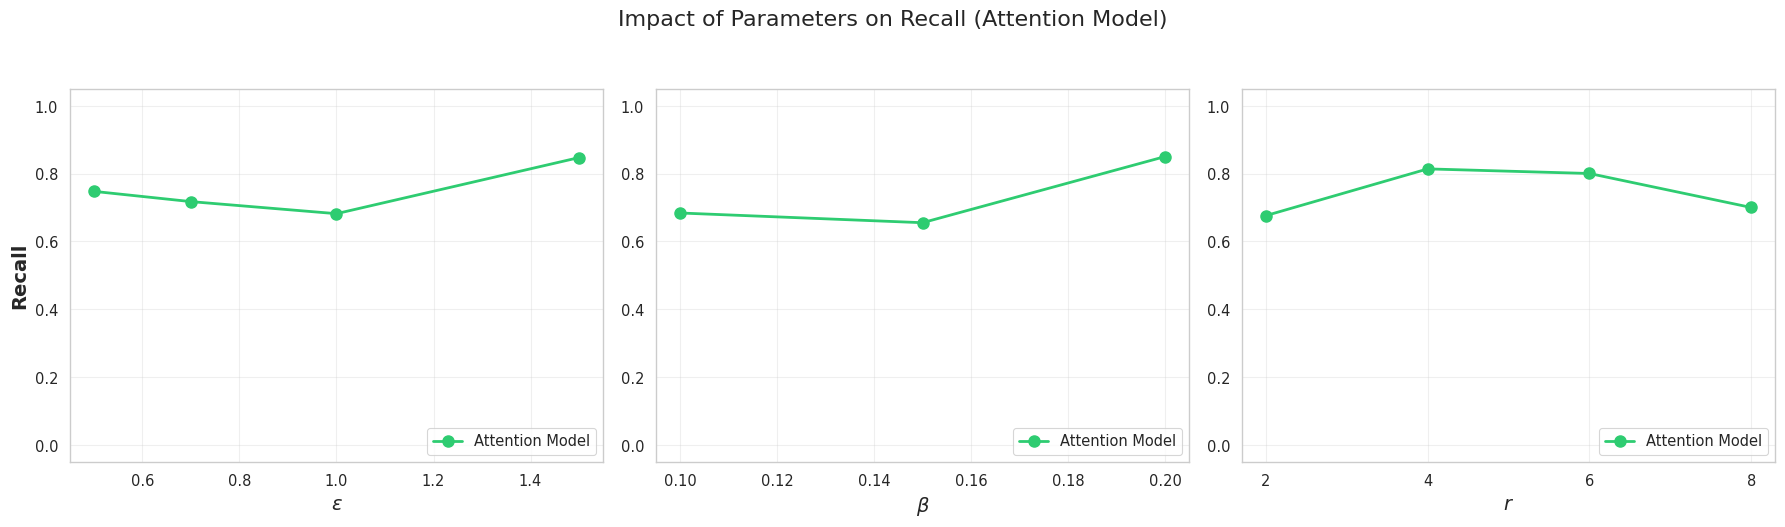

In [ ]:
test_indices = train_test_split(
    range(len(df)), test_size=0.2, random_state=42, stratify=y
)[1]

df_test = df.iloc[test_indices].reset_index(drop=True)


sens_df = run_sensitivity_analysis(
    model,
    df_test,
    scaler,
    TRAINING_FEATURES,
    device,
    batch_size=4096
)


print("\n" + "="*70)
print("SENSITIVITY ANALYSIS RESULTS")
print("="*70)
print(sens_df.to_string())

# Plot all metrics
print("\nPlotting F1-Score...")
plot_sensitivity_metric(sens_df, metric='F1_Score')

print("\nPlotting Accuracy...")
plot_sensitivity_metric(sens_df, metric='Accuracy')

print("\nPlotting Precision...")
plot_sensitivity_metric(sens_df, metric='Precision')

print("\nPlotting Recall...")
plot_sensitivity_metric(sens_df, metric='Recall')